## Logistic Regression - 
It is a classification model that is very easy to implement but perfroms very well on linearly seperable class.
Compare to Perceptron and Adaline algorithm,it can be extended to multiclass classification.

Lets understand the problem with liner regression for classification and solution for it.
look below the diagram:
<img src="log_reg2.jpg" width="50%">
following equation which has a threshold of 0.5 describe the above diagram.
${ h }_{ \theta  }(x)\quad =\quad \begin{cases} 1\quad \quad \quad \quad { h }_{ \theta  }(x)\ge 1 \\ 0\qquad \quad { h }_{ \theta  }(x)<0 \end{cases}$
Lets assume if we get a extra training point in dataset which made shift the equation and then we find the following:-
<img src="log_reg3.jpg" width="50%">
As we can see 2 points get misclassified.here the problem is that ${ h }_{ \theta  }(x)$ can predict for >1 and < 0.

Hence the concept of Logistic Regression is brought in.Which is making ${ h }_{ \theta  }(x)$ between 0 and 1.


### Hypothesis Representation
${ h }_{ \theta  }(x)$ = $g({ \theta  }^{ T })$,
assume ${ \theta  }^{ T }$ = z

g(z) = $\frac { 1 }{ 1+{ e }^{ -{ \theta  }^{ T }x } }  $ 
 
Combining above two eqn,we get:-

${ h }_{ \theta  }(x)$ =  $\frac { 1 }{ 1+{ e }^{ -{ \theta  }^{ T }x } }  $

###### Above equation is also know as Sigmoid function or logistic funciton.

## Lets draw the sigmoid function

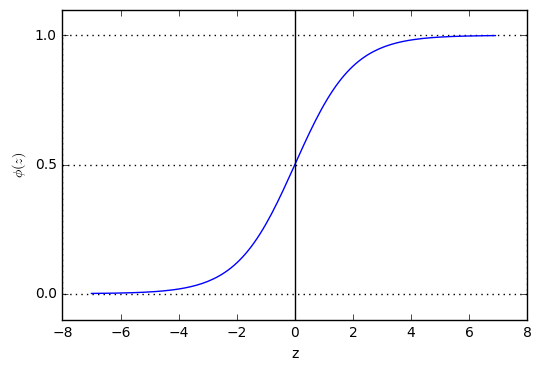

In [4]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show() 

We can see that${ h }_{ \theta  }(x)$ approaches towars 1 when z moves toward $\infty $ and approches towards 0 when z ->-$\infty $.

following is how logistic model is working:-

<img src="log_reg4.png" width="50%">

Interpretation of Hypothesis Output:-
${ h }_{ \theta  }(x)$ = p(y=1|x:$\theta$) ->"probability that y=1,givenx,parameterized by $\theta$.



### Cost function for Logistic Regression

We cannot use the same cost function that we use for linear regression because Logistic function will cause the output to be **wavy**,causing many local optima.In other words,that will not be a convex curve.

Instead Logistic function will look like :-

J($\theta$) = $\frac { 1 }{ m } \sum _{ 1 }^{ m }{ Cost({ h }_{ \theta  }({ x }^{ (i) }),{ y }^{ (i) }) } $

$Cost({ h }_{ \theta  }({ x }^{ (i) }),{ y }^{ (i) })$  =$\begin{cases} -\log { ({ h }_{ \theta  }(x)) } \quad if\quad y=1 \\ -\log { (1-{ h }_{ \theta  }(x)) } \quad if\quad y=0 \end{cases}$

Following plot illustrate the cost for classification:-
<img src="log_reg5.png" width="50%">

we can see that cost approaches 0(blue line) if we correctly predict that a sample belongs to class 1.And so for class 0.If prediction goes wrong,then cost goes towards infinity.Hence we need to penalize wrong prediction with an increasing larger cost.

To fit parameter $\theta$,we have to minimize J($\theta$).

We can minimize the cost function with Gradient descent.

Repeat 
{

${ \theta  }_{ j }$ = ${ \theta  }_{ j }$ - $\alpha \frac { \delta  }{ \delta { \theta  }_{ j } } J(\theta )$

}

$\frac { \delta  }{ \delta { \theta  }_{ j } } J(\theta )$ = $\frac { 1 }{ m } \sum _{ 1 }^{ m }{ ({ h }_{ \theta  }({ x }^{ (i) })-{ y }^{ (i) }) } { X }_{ j }^{ (i) }$    

## Lets train our data

** here we are going to use scikit-learn which use highly optimized version of logistic Regression which also support multi-class classification **

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cross_validation import train_test_split

C:\Users\INDRESH KUMAR\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
#considering petal length and petal width only
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

0.68888888888888888

In [25]:
lr1 = LogisticRegression(C = 1000)
lr1.fit(X_train,y_train)
lr1_pred = lr.predict(X_test)
lr1.score(X_test,y_test)

0.97777777777777775

In [28]:
#lets standarize the data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
lr2 = LogisticRegression()
lr2.fit(X_train_std,y_train)
lr2.score(X_test_std,y_test)

0.80000000000000004

In [54]:
#lets use the parameter
lr3 = LogisticRegression(C = 1000)
lr3.fit(X_train_std,y_train)
lr3.score(X_test_std,y_test)

0.97777777777777775

In [61]:
from matplotlib.colors import ListedColormap

def plot_decision_region(X,y,classifier,test_idx = None,resolution = 0.02):
    
    #setup marker generator and color map
    markers = ['^','x','o','v']
    colors = ['red','green','gray','cyan']
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plotting the decision surface
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)   
    z = z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha=0.4,cmap = cmap)
    plt.xlim(xx1.min() ,xx1.max())
    plt.ylim(xx2.min() ,xx2.max())  
    
    #plot all samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl,0],X[y==cl,1],alpha = 0.8,c = cmap(idx),marker=markers[idx],label=cl)
    
    #highlight test sample
    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',alpha = 1.0,linewidth =1,marker = 'o',s = 55,label = 'test set')
        


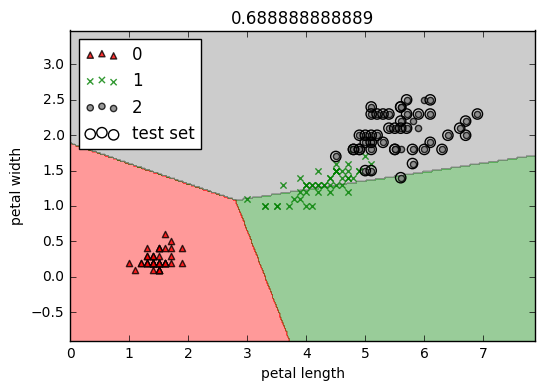

In [78]:
#without regularization parameter c and standarization
lr = LogisticRegression()
lr.fit(X_train,y_train)
plot_decision_region(X,y,classifier=lr,test_idx =range(105,150))
plt.legend(loc = 'upper left')
plt.title(lr.score(X_test,y_test))
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

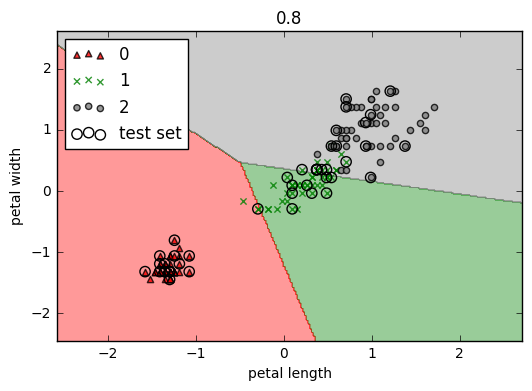

In [80]:
#without regularization parameter but with satardization
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_region(X_combined_std,y_combined,classifier = lr2,test_idx = range(105,150))
plt.legend(loc = 'upper left')
plt.title(lr2.score(X_test_std,y_test))
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()


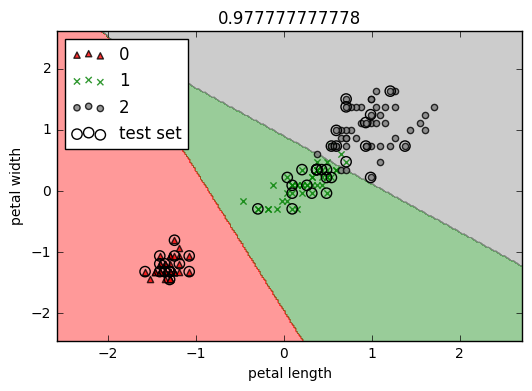

In [81]:
#with regularization parameter and standarization
plot_decision_region(X_combined_std,y_combined,classifier = lr3,test_idx = range(105,150))
plt.legend(loc = 'upper left')
plt.title(lr3.score(X_test_std,y_test))
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

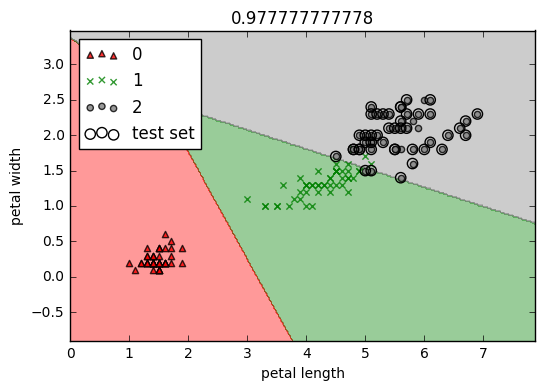

In [83]:
#with reularzation but without standarization
lr4 = LogisticRegression(C=1000)
lr4.fit(X_train,y_train)
plot_decision_region(X,y,classifier = lr4,test_idx = range(105,150))
plt.legend(loc = 'upper left')
plt.title(lr4.score(X_test,y_test))
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

In [90]:
lr3.coef_
#each row is showing weight coefficient of particular class with rest

array([[-7.34015187, -6.64685581],
       [ 2.54373335, -2.3421979 ],
       [ 9.46617627,  6.44380858]])

#### Effect of C(regularization parameter) on weight coefficient

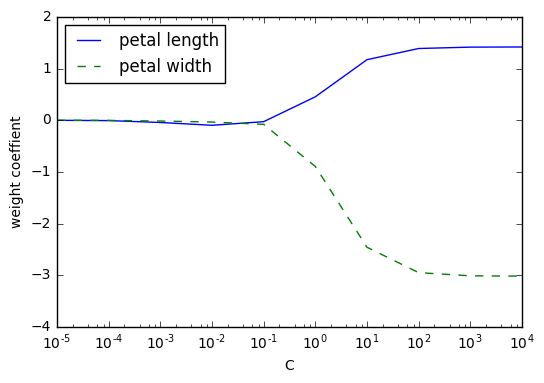

In [100]:
#here i am considering the class 2 v/s rest weight coefficient.
weights,params = [],[]
for c in np.arange(-5,5):
    lr = LogisticRegression(C = 10**c,random_state = 0)
    lr.fit(X_train,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
plt.plot(params,weights[:,0],label = 'petal length')
plt.plot(params,weights[:,1],label = 'petal width',linestyle = '--')
plt.ylabel("weight coeffient")
plt.xlabel("C")
plt.xscale('log')
plt.legend(loc = 'upper left')
plt.show()